In [1]:
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from struct import pack, unpack

sys.path.insert(0, "../")
from paths import FIG_DIR, DATA_DIR

In [ ]:
def initialize_transitive_tournament(m):
    return np.triu(np.ones((m, m))) - np.tril(np.ones((m, m))) # transitive preferences

# Generating samples and storing them

In [34]:
num_samples = 10000

m = 4
rng = np.random.default_rng(2025 - m)

upper_tri = np.triu(np.ones((m, m)), 1)
lower_tri = np.tril(np.ones((m, m)), -1)
alpha = np.ones(m)

p_matr = rng.dirichlet(alpha, (num_samples, 2))
print(p_matr[:, 1, :].shape)
winner_prob = np.sum((p_matr[:, 0, :] @ upper_tri) * p_matr[:, 1, :], axis=1) # prob that first lottery better
eq_prob = np.sum(p_matr[:, 0, :] * p_matr[:, 1, :], axis=1)
loser_prob = np.sum((p_matr[:, 0, :] @ lower_tri) * p_matr[:, 1, :], axis=1) # prob that first lottery worse

# with open(DATA_DIR / 'win_{:03d}.dat'.format(m), 'wb') as file:
#     file.write(pack('d' * len(samples) , *samples))

assert np.allclose(winner_prob + eq_prob + loser_prob, 1)
winner_prob[:10], eq_prob[:10], loser_prob[:10]

(10000, 4)


(array([0.26169892, 0.41284902, 0.26973048, 0.56843019, 0.48630528,
        0.32119922, 0.2680977 , 0.27044664, 0.73037721, 0.1083769 ]),
 array([0.20766893, 0.18658742, 0.28746529, 0.22029097, 0.15938863,
        0.35041809, 0.28016707, 0.26870665, 0.18609924, 0.10253978]),
 array([0.53063215, 0.40056357, 0.44280423, 0.21127884, 0.35430609,
        0.32838269, 0.45173523, 0.46084671, 0.08352355, 0.78908333]))

In [51]:
rng = np.random.default_rng(2020 - m)
s = 10

dice = rng.choice(m, (num_samples, 2, s))
n_k = np.sum(dice[:, 0, None, :] > dice[:, 1, :, None], axis=(1, 2))
e_k = np.sum(dice[:, 0, None, :] == dice[:, 1, :, None], axis=(1, 2))

n_k[:10], e_k[:10]

(array([21, 52, 30, 28, 36, 47, 19, 34, 40, 27]),
 array([24, 30, 25, 24, 27, 21, 24, 25, 27, 24]))

# Plotting

In [52]:
df_samples = pd.DataFrame({
    'winner_prob': winner_prob,
    'eq_prob': eq_prob,
    'n_k_norm': n_k/s**2,
    'e_k_norm': e_k/s**2,
    'n_k': n_k,
    'e_k': e_k,
})

df_samples

,winner_prob,eq_prob,n_k_norm,e_k_norm,n_k,e_k
0,0.261699,0.207669,0.21,0.24,21,24
1,0.412849,0.186587,0.52,0.30,52,30
2,0.269730,0.287465,0.30,0.25,30,25
3,0.568430,0.220291,0.28,0.24,28,24
4,0.486305,0.159389,0.36,0.27,36,27
...,...,...,...,...,...,...
9995,0.376356,0.163799,0.42,0.26,42,26
9996,0.415879,0.157555,0.36,0.24,36,24
9997,0.552217,0.237044,0.22,0.24,22,24
9998,0.168604,0.326963,0.36,0.31,36,31


<Axes: xlabel='n_k_norm', ylabel='Count'>

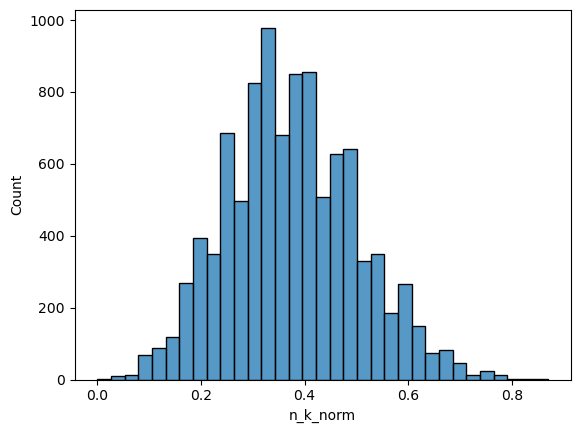

In [53]:
sns.histplot(df_samples['n_k_norm'], bins=33)

<Axes: xlabel='winner_prob', ylabel='Count'>

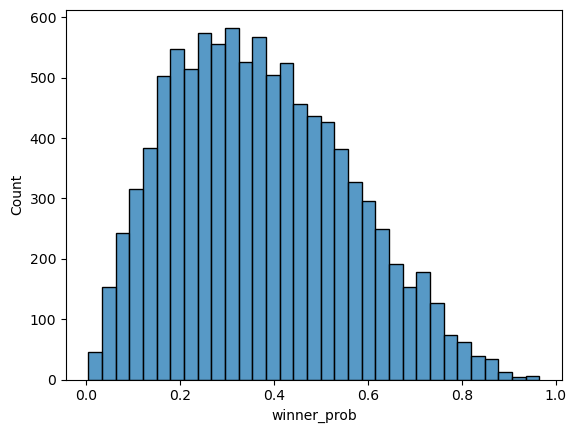

In [42]:
sns.histplot(df_samples['winner_prob'], bins=33)

In [54]:
df_samples.describe()

,winner_prob,eq_prob,n_k_norm,e_k_norm,n_k,e_k
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.373235,0.249058,0.374857,0.251247,37.485700,25.124700
std,0.185695,0.085317,0.126237,0.043591,12.623721,4.359134
min,0.005588,0.016449,0.000000,0.050000,0.000000,5.000000
25%,0.226458,0.193370,0.290000,0.230000,29.000000,23.000000
50%,0.356930,0.244616,0.370000,0.250000,37.000000,25.000000
75%,0.504239,0.297859,0.460000,0.280000,46.000000,28.000000
max,0.965007,0.746270,0.870000,0.490000,87.000000,49.000000


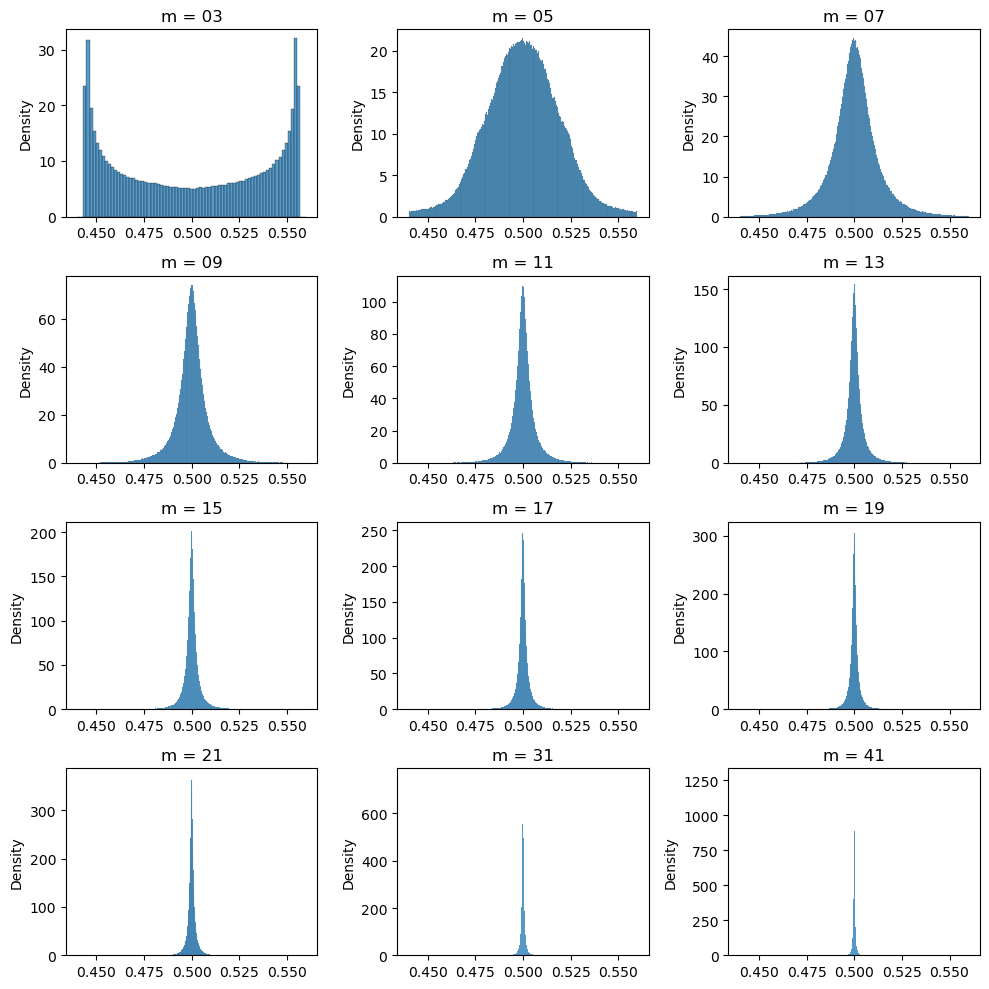

In [29]:
fig, ax = plt.subplots(4, 3, figsize=(10, 10))
columns = [['03', '05', '07'], ['09', '11', '13'], ['15', '17', '19'], ['21', '31', '41']]
# columns = [['03', '05', None], [None, None, None], [None, None, None], [None,  None, None]]

for i in range(4):
    for j in range(3):
        col = columns[i][j]
        if col is not None:
            g = sns.histplot(df_samples[col], ax=ax[i,j], stat='density', binrange=(0.44, 0.56))
            g.axes.set_title("m = " + col)
            g.set_xlabel(None)

fig.tight_layout()

fig.savefig(FIG_DIR / "distr_intr_lcs.svg")
fig.savefig(FIG_DIR / "distr_intr_lcs.png", dpi=300)
fig.savefig(FIG_DIR / "distr_intr_lcs.pdf")

In [15]:
df_samples.describe().T

,count,mean,std,min,25%,50%,75%,max
03,1000000.0,0.500029,3.991877e-02,4.444444e-01,0.459515,0.500079,0.540489,5.555556e-01
05,1000000.0,0.499997,2.127398e-02,4.097187e-01,0.487184,0.499977,0.512830,5.903501e-01
07,1000000.0,0.500015,1.336953e-02,3.986979e-01,0.493482,0.500011,0.506539,5.973805e-01
09,1000000.0,0.499989,9.287040e-03,4.056506e-01,0.495942,0.499993,0.504046,5.937496e-01
11,1000000.0,0.499992,6.880279e-03,4.152450e-01,0.497204,0.499994,0.502790,5.746161e-01
13,1000000.0,0.500004,5.330388e-03,4.255242e-01,0.497953,0.500003,0.502053,5.628298e-01
15,1000000.0,0.499997,4.257813e-03,4.429957e-01,0.498409,0.499995,0.501580,5.523096e-01
17,1000000.0,0.500004,3.490950e-03,4.566510e-01,0.498736,0.500000,0.501266,5.557108e-01
19,1000000.0,0.500008,2.958036e-03,4.516571e-01,0.498966,0.500005,0.501044,9.687500e-01
21,1000000.0,0.500000,2.496784e-03,1.718750e-01,0.499131,0.499998,0.500864,5.355414e-01


In [20]:
df_samples.quantile([0.001, 0.01, 0.05, 0.95, 0.99, 0.999]).T

,0.001,0.010,0.050,0.950,0.990,0.999
03,0.444445,0.444470,0.445069,0.554928,0.555531,0.555555
05,0.417395,0.441830,0.467074,0.532915,0.558300,0.582617
07,0.439352,0.462010,0.478644,0.521373,0.538107,0.561179
09,0.454436,0.472594,0.485298,0.514638,0.527296,0.545509
11,0.464563,0.479215,0.489326,0.510676,0.520642,0.535269
13,0.471529,0.483746,0.491889,0.508118,0.516244,0.528751
15,0.476464,0.486978,0.493602,0.506405,0.513054,0.523940
17,0.480275,0.489264,0.494809,0.505216,0.510739,0.519858
19,0.483103,0.491075,0.495701,0.504340,0.509047,0.516769
21,0.485622,0.492431,0.496367,0.503630,0.507631,0.514681


In [26]:
print("Invalid samples for m = 21: ", df_samples['21'][(df_samples['21'] < 0) | (df_samples['21'] > 1)].count())
print("Invalid samples for m = 31: ", df_samples['31'][(df_samples['31'] < 0) | (df_samples['21'] > 1)].count())
print("Invalid samples for m = 41: ", df_samples['41'][(df_samples['41'] < 0) | (df_samples['41'] > 1)].count())

Invalid samples for m = 21:  0
Invalid samples for m = 31:  51
Invalid samples for m = 41:  3995


# Gaussians

In [58]:
num_samples = 10000

gamma = -5/12

rng = np.random.default_rng()
cov = np.array([[1, gamma, gamma], [gamma, 1, gamma], [gamma, gamma, 1]])
samples = rng.multivariate_normal([0, 0, 0], cov, num_samples)
np.sum(np.sum(samples > 0, axis=1) == 3)

221

In [22]:
num_samples = 10000
m = 4
alpha = np.ones(m)
rng = np.random.default_rng()

p_matr = rng.dirichlet(alpha, (num_samples, 3))
print(p_matr.shape)

upper_tri = np.triu(np.ones((m, m)), 1)

comparisons = np.zeros((num_samples, 3))
comparisons[:, 0] = np.sum((p_matr[:, 0] @ upper_tri) * p_matr[:, 1], axis=1) + 0.5*np.sum(p_matr[:, 0] * p_matr[:, 1], axis=1)
comparisons[:, 1] = np.sum((p_matr[:, 1] @ upper_tri) * p_matr[:, 2], axis=1) + 0.5*np.sum(p_matr[:, 1] * p_matr[:, 2], axis=1)
comparisons[:, 2] = np.sum((p_matr[:, 2] @ upper_tri) * p_matr[:, 0], axis=1) + 0.5*np.sum(p_matr[:, 2] * p_matr[:, 0], axis=1)

# print(np.sum((p_matr[0, 0] @ upper_tri) * p_matr[0, 1]), np.sum(p_matr[0, 0] * p_matr[0, 1]), np.sum((p_matr[0, 0] @ upper_tri) * p_matr[0, 1]) + 0.5*np.sum(p_matr[0, 0] * p_matr[0, 1]))
# print(np.sum((p_matr[0, 1] @ upper_tri) * p_matr[0, 2]), np.sum(p_matr[0, 1] * p_matr[0, 2]), np.sum((p_matr[0, 1] @ upper_tri) * p_matr[0, 2]) + 0.5*np.sum(p_matr[0, 1] * p_matr[0, 2]))
# print(np.sum((p_matr[0, 2] @ upper_tri) * p_matr[0, 0]), np.sum(p_matr[0, 2] * p_matr[0, 0]), np.sum((p_matr[0, 2] @ upper_tri) * p_matr[0, 0]) + 0.5*np.sum(p_matr[0, 2] * p_matr[0, 0]))

np.sum(np.sum(comparisons > 0.5, axis=1) == 0) + np.sum(np.sum(comparisons > 0.5, axis=1) == 3)

(10000, 3, 4)


18

In [29]:
n = 5000

dice = rng.uniform(size=(num_samples, 3, n))
for i in range(num_samples):
    for j in range(3):
        dice_value = rng.choice(m, size=n, p=p_matr[i, j])
        dice[i, j] += dice_value

print(np.sum(dice[0, 0, :, None] < dice[0, 1, None, :])/n**2)
print(np.sum(dice[0, 1, :, None] < dice[0, 2, None, :])/n**2)
print(np.sum(dice[0, 2, :, None] < dice[0, 0, None, :])/n**2)

0.70910108
0.48260196
0.33298012


In [30]:
comparisons[0]

array([0.71190096, 0.48327516, 0.33002386])

In [35]:
dice_comp = np.zeros((num_samples, 3))
batch_size = 200

for i in range(0, num_samples, batch_size):
    for j in range(3):
        dice_comp[i:i+batch_size, j] = np.sum(dice[i:i+batch_size, j, :, None] < dice[i:i+batch_size, (j+1)%3, None, :], axis=(1, 2))/n**2

In [36]:
np.sum(np.sum(dice_comp > 0.5, axis=1) == 0) + np.sum(np.sum(dice_comp > 0.5, axis=1) == 3)

16

In [41]:
lott_mask = (np.sum(comparisons > 0.5, axis=1) == 0) | (np.sum(comparisons > 0.5, axis=1) == 3)
comparisons[lott_mask]

array([[0.48709099, 0.48939381, 0.49119335],
       [0.49349068, 0.41155329, 0.43466088],
       [0.50144868, 0.50167353, 0.53743744],
       [0.48815672, 0.47766375, 0.48077788],
       [0.48844431, 0.48419039, 0.47567966],
       [0.52096011, 0.52041812, 0.50254261],
       [0.49026092, 0.48537427, 0.46786658],
       [0.49767372, 0.47862363, 0.46551927],
       [0.49726915, 0.47900531, 0.45927625],
       [0.46043218, 0.47329816, 0.49243295],
       [0.52076448, 0.50085496, 0.50527482],
       [0.47513004, 0.48883582, 0.49805123],
       [0.50013824, 0.56401906, 0.50213584],
       [0.43362846, 0.49496902, 0.4892453 ],
       [0.47631842, 0.45613422, 0.49075107],
       [0.49064588, 0.49801485, 0.4895527 ],
       [0.50845663, 0.54190593, 0.50203541],
       [0.50013761, 0.56552953, 0.50633794]])

In [40]:
dice_mask = (np.sum(dice_comp > 0.5, axis=1) == 0) | (np.sum(dice_comp > 0.5, axis=1) == 3)
dice_comp[dice_mask]

array([[0.50525032, 0.5087626 , 0.53106488],
       [0.49615028, 0.40022952, 0.43492384],
       [0.49383704, 0.46982456, 0.4869492 ],
       [0.4892952 , 0.48874068, 0.46206024],
       [0.49362928, 0.45728992, 0.49394692],
       [0.52551744, 0.52028252, 0.50145756],
       [0.48519412, 0.48758216, 0.4681474 ],
       [0.492335  , 0.49337084, 0.4553752 ],
       [0.49738276, 0.47770564, 0.46444212],
       [0.501579  , 0.56713404, 0.50012984],
       [0.48210876, 0.49395612, 0.49776088],
       [0.46871956, 0.45747392, 0.49765288],
       [0.49443756, 0.49671884, 0.48712388],
       [0.50545072, 0.50041748, 0.50080612],
       [0.51420976, 0.53492052, 0.50255592],
       [0.50693612, 0.55922644, 0.51002668]])

In [43]:
lott_indices = np.where(lott_mask)[0]
dice_indices = np.where(dice_mask)[0]
lott_indices, dice_indices

(array([ 930, 1519, 1694, 1715, 3068, 3725, 4012, 4314, 4469, 4877, 6107,
        6392, 6718, 6833, 7621, 8660, 9151, 9554]),
 array([ 499, 1519, 1715, 3068, 3105, 3725, 4012, 4314, 4469, 6718, 6960,
        7621, 8660, 9138, 9151, 9554]))

In [44]:
p_comp = comparisons

In [45]:
np.save(DATA_DIR / '12a_p_matr.npy', p_matr)
np.save(DATA_DIR / '12a_dice.npy', dice)
np.save(DATA_DIR / '12a_dice_comp.npy', dice_comp)

In [46]:
dice.shape

(10000, 3, 5000)

In [54]:
print(np.sum((dice[:, 0, 0] > dice[:, 1, 0]) & (dice[:, 0, 0] > dice[:, 1, 1]))/num_samples)
print(np.sum((dice[:, 1, 0] > dice[:, 2, 0]) & (dice[:, 1, 0] > dice[:, 2, 1]))/num_samples)
print(np.sum((dice[:, 2, 0] > dice[:, 0, 0]) & (dice[:, 2, 0] > dice[:, 0, 1]))/num_samples)

0.3531
0.3571
0.3629


In [55]:
print(np.sum((dice[:, 0, 0] > dice[:, 1, 0]) & (dice[:, 0, 1] > dice[:, 1, 0]))/num_samples)
print(np.sum((dice[:, 1, 0] > dice[:, 2, 0]) & (dice[:, 1, 1] > dice[:, 2, 0]))/num_samples)
print(np.sum((dice[:, 2, 0] > dice[:, 0, 0]) & (dice[:, 2, 1] > dice[:, 0, 0]))/num_samples)

0.3552
0.3597
0.3588


In [64]:
np.cov(dice_comp, rowvar=False)/0.0323

array([[ 1.01124656, -0.49142352, -0.48631159],
       [-0.49142352,  1.00190488, -0.4685275 ],
       [-0.48631159, -0.4685275 ,  0.99423221]])

In [72]:
np.cov(dice_comp, rowvar=False)

array([[ 0.03266326, -0.01587298, -0.01570786],
       [-0.01587298,  0.03236153, -0.01513344],
       [-0.01570786, -0.01513344,  0.0321137 ]])

In [70]:
np.cov(dice_comp*5000**2, rowvar=False)/5000**3

array([[163.31631998, -79.36489789, -78.53932124],
       [-79.36489789, 161.80763839, -75.66719119],
       [-78.53932124, -75.66719119, 160.56850212]])

In [71]:
np.var(dice_comp, axis=0)

array([0.03266   , 0.03235829, 0.03211049])

In [73]:
np.mean(dice_comp, axis=0)

array([0.50095862, 0.50098207, 0.49852201])

In [98]:
p = 0.5
q = 43/120

n*n*(n*(q-p**2)*2 + p**2 + p - 2*q)/n**3

0.2166733333333333

In [97]:
np.var(dice_comp[:, 0])

0.03265999766898599

In [100]:
np.var(p_comp, axis=0)

array([0.03263925, 0.03233599, 0.03207568])

In [20]:
num_samples = 10000
m = 4
n = 5000

upper_tri = np.triu(np.ones((m, m)), 1)

p_matr = np.load(DATA_DIR / '12a_p_matr.npy')
dice = np.load(DATA_DIR / '12a_dice.npy')
dice_comp = np.load(DATA_DIR / '12a_dice_comp.npy')

p_comp = np.zeros((num_samples, 3))
p_comp[:, 0] = np.sum((p_matr[:, 0] @ upper_tri) * p_matr[:, 1], axis=1) + 0.5*np.sum(p_matr[:, 0] * p_matr[:, 1], axis=1)
p_comp[:, 1] = np.sum((p_matr[:, 1] @ upper_tri) * p_matr[:, 2], axis=1) + 0.5*np.sum(p_matr[:, 1] * p_matr[:, 2], axis=1)
p_comp[:, 2] = np.sum((p_matr[:, 2] @ upper_tri) * p_matr[:, 0], axis=1) + 0.5*np.sum(p_matr[:, 2] * p_matr[:, 0], axis=1)

p_matr.shape, p_comp.shape, dice.shape, dice_comp.shape

((10000, 3, 4), (10000, 3), (10000, 3, 5000), (10000, 3))

In [84]:
rng = np.random.default_rng()

p1 = p_matr[1, 0]
p2 = p_matr[1, 1]


In [87]:
dice1 = rng.choice(m, size=(5000, 1000), p=p1) + rng.uniform(size=(5000, 1000))
dice2 = rng.choice(m, size=(5000, 1000), p=p2) + rng.uniform(size=(5000, 1000))

small_comp = np.sum(dice1[:, :, None] < dice2[:, None, :], axis=(1, 2))
np.var(small_comp)/1000**3

0.16658103818873723

In [92]:
count_q = 0
count_r = 0

for i in range(0, 1000, 2):
    count_q += np.sum((dice1[:, i] < dice2[:, i]) & (dice1[:, i+1] < dice2[:, i]))
    count_r += np.sum((dice1[:, i] < dice2[:, i]) & (dice1[:, i] < dice2[:, i+1]))

count_q/(5000*500), count_r/(5000*500)

(0.5114504, 0.4202056)

In [76]:
count_q/500**2 - pk**2 + count_r/500**2 - pk**2 + (pk**2 + pk - count_q/500**2 - count_r/500**2)/1000

0.16379998416083408

In [94]:
pk = 0
for i in range(4):
    for j in range(i+1, 4):
        pk += p1[i]*p2[j]
for i in range(4):
    pk += p1[i]*p2[i]/2

qk = 0
for i in range(4):
    for j in range(i+1, 4):
        for k in range(j+1, 4):
            qk += 2*p1[i]*p1[j]*p2[k]
for i in range(4):
    for j in range(i+1, 4):
        qk += (p1[i]**2)*p2[j]
        qk += p1[i]*p1[j]*p2[j]
for i in range(4):
    qk += 1/3*(p1[i]**2)*p2[i]

rk = 0
for i in range(4):
    for j in range(i+1, 4):
        for k in range(j+1, 4):
            rk += 2*p1[i]*p2[j]*p2[k]
for i in range(4):
    for j in range(i+1, 4):
        rk += p1[i]*p2[j]**2
        rk += p1[i]*p2[i]*p2[j]
for i in range(4):
    rk += 1/3*p1[i]*p2[i]**2

pk, qk, rk

(0.6190380109125097, 0.5116074473136729, 0.4200255566953497)

In [95]:
qk - pk**2 + rk - pk**2 + (pk**2 + pk - qk - rk)/1000

0.1652874991658478

In [92]:
np.var(small_comp/1000**2)

0.000162159755350816

In [23]:
count_pk = 0

for i in range(5000):
    count_pk += np.sum(dice[:, 0, i] < dice[:, 1, i])

count_pk/(5000*10000)

0.50100722

In [4]:
count_pk2 = 0

for i in range(0, 5000, 2):
    count_pk2 += np.sum((dice[:, 0, i] < dice[:, 1, i]) & (dice[:, 0, i+1] < dice[:, 1, i+1]))

count_pk2/(2500*10000)

0.28358408

In [6]:
count_pksucc = 0

for i in range(0, 5000, 2):
    count_pksucc += np.sum((dice[:, 0, i] < dice[:, 1, i]) & (dice[:, 1, i] < dice[:, 2, i]))

count_pksucc/(2500*10000)

0.16760024

In [7]:
count = 0

for i in range(0, 5000, 2):
    count += np.sum((dice[:, 0, i] < dice[:, 1, i]) & (dice[:, 1, i+1] < dice[:, 2, i]))

count/(2500*10000)

0.23512044

In [2]:
def compute_mu_k(m):
    denominator = m**2
    nominator = 0
    for i in range(m):
        for j in range(i, m):
            if i == j:
                nominator += 1/2
            else:
                nominator += 1
    print('nom:', nominator, 'denom:', denominator)
    return nominator/denominator

compute_mu_k(4)

nom: 8.0 denom: 16


0.5

In [3]:
def compute_theta_k(m):
    denominator = m**2*(m+1)
    nominator = 0
    for i in range(m):
        for j in range(m):
            for k in range(max(i, j), m):
                summand = 1
                if i == j:
                    summand *= 2
                if i == j == k:
                    summand *= 1/3
                elif i == k or j == k:
                    summand *= 1/2
                nominator += summand
    print('nom:', nominator, 'denom:', denominator)
    return nominator/denominator

compute_theta_k(4)

nom: 28.666666666666668 denom: 80


0.35833333333333334

In [4]:
def compute_rho_k(m):
    denominator = m**2*(m+1)
    nominator = 0
    for i in range(m):
        for j in range(m):
            for k in range(min(i, j) + 1):
                    summand = 1
                    if i == j:
                        summand *= 2
                    if i == j == k:
                        summand *= 1/3
                    elif i == k or j == k:
                        summand *= 1/2
                    nominator += summand
    print('nom:', nominator, 'denom:', denominator)
    return nominator/denominator

compute_rho_k(4)

nom: 28.666666666666668 denom: 80


0.35833333333333334

In [5]:
def compute_omega_k(m):
    denominator = (m*(m+1))**2
    nominator = 0
    for s1 in range(m):
        for s2 in range(m):
            for t1 in range(s1, m):
                for t2 in range(s2, m):
                    summand = 1
                    if s1 == s2:
                        summand *= 2
                    if t1 == t2:
                        summand *= 2
                    if s1 == t1:
                        summand *= 1/2
                    if s2 == t2:
                        summand *= 1/2
                    nominator += summand
    print('nom:', nominator, 'denom:', denominator)
    return nominator/denominator

compute_omega_k(4)

nom: 113.0 denom: 400


0.2825

In [6]:
def compute_phi_k(m):
    denominator = m**3
    nominator = 0
    for i in range(m):
        for j in range(i, m):
            for k in range(j, m):
                summand = 1
                if i == j == k:
                    summand *= 1/6
                elif i == j or j == k:
                    summand *= 1/2
                nominator += summand
    print('nom:', nominator, 'denom:', denominator)
    return nominator/denominator

compute_phi_k(4)

nom: 10.666666666666664 denom: 64


0.16666666666666663

In [7]:
def compute_psi_k(m):
    denominator = m**3*(m+1)
    nominator = 0
    for s in range(m):
        for t1 in range(s, m):
            for t2 in range(m):
                for u in range(t2, m):
                    summand = 1
                    if t1 == t2:
                        summand *= 2
                    if s == t1:
                        summand *= 1/2
                    if t2 == u:
                        summand *= 1/2
                    nominator += summand
    print('nom:', nominator, 'denom:', denominator)
    return nominator/denominator

compute_psi_k(4)

nom: 75.0 denom: 320


0.234375

In [14]:
m = 4
(compute_psi_k(m) - compute_mu_k(m)**2)/(compute_omega_k(m) - compute_mu_k(m)**2)

nom: 75.0 denom: 320
nom: 8.0 denom: 16
nom: 113.0 denom: 400
nom: 8.0 denom: 16


-0.48076923076923117

In [24]:
(0.23512044 - 0.50100722**2)/(0.28358408 - 0.50100722**2)

-0.4877170260489248

In [25]:
3*np.arcsin((compute_psi_k(m) - compute_mu_k(m)**2)/(compute_omega_k(m) - compute_mu_k(m)**2)) / (4*np.pi) + 1/8

nom: 75.0 denom: 320
nom: 8.0 denom: 16
nom: 113.0 denom: 400
nom: 8.0 denom: 16


0.005268109396227308